In [2]:
import pandas as pd
import mplfinance as mpf

# === Load OHLC data ===
ohlc = pd.read_csv("applyiedMacd-1.csv", parse_dates=["DateTime"])
ohlc.set_index("DateTime", inplace=True)

# === Load trades CSV ===
trades = pd.read_csv("bt.result.csv", parse_dates=["Entry Time", "Exit Time"])

In [3]:
# === Prepare aligned lists ===
entries = [None] * len(ohlc)
exits   = [None] * len(ohlc)
sl_vals = [None] * len(ohlc)
tp_vals = [None] * len(ohlc)

for _, trade in trades.iterrows():
    entry_idx = int(trade['Candle Index Entry'])
    exit_idx  = int(trade['Candle Index Exit'])

    if 0 <= entry_idx < len(ohlc):
        entries[entry_idx] = ohlc['Close'].iloc[entry_idx]
        sl_vals[entry_idx] = trade['SL']
        tp_vals[entry_idx] = trade['TP']

    if 0 <= exit_idx < len(ohlc):
        exits[exit_idx] = ohlc['Close'].iloc[exit_idx]

In [ ]:
# === Limit to 500 rows (first or last) ===
ohlc_limited = ohlc.iloc[:250]     # first 500
# ohlc_limited = ohlc.iloc[-500:]  # last 500

# Slice markers and convert to Series with correct index
idx = ohlc_limited.index
entries = pd.Series(entries[:len(ohlc_limited)], index=idx)
exits   = pd.Series(exits[:len(ohlc_limited)], index=idx)
sl_vals = pd.Series(sl_vals[:len(ohlc_limited)], index=idx)
tp_vals = pd.Series(tp_vals[:len(ohlc_limited)], index=idx)

# === Add plots ===
ap = [
    mpf.make_addplot(entries, type='scatter', marker='^', color='green', markersize=12),
    mpf.make_addplot(exits,   type='scatter', marker='v', color='red',   markersize=12),
    mpf.make_addplot(sl_vals, type='scatter', marker='_', color='blue',  markersize=8),
    mpf.make_addplot(tp_vals, type='scatter', marker='_', color='orange',markersize=8),
]


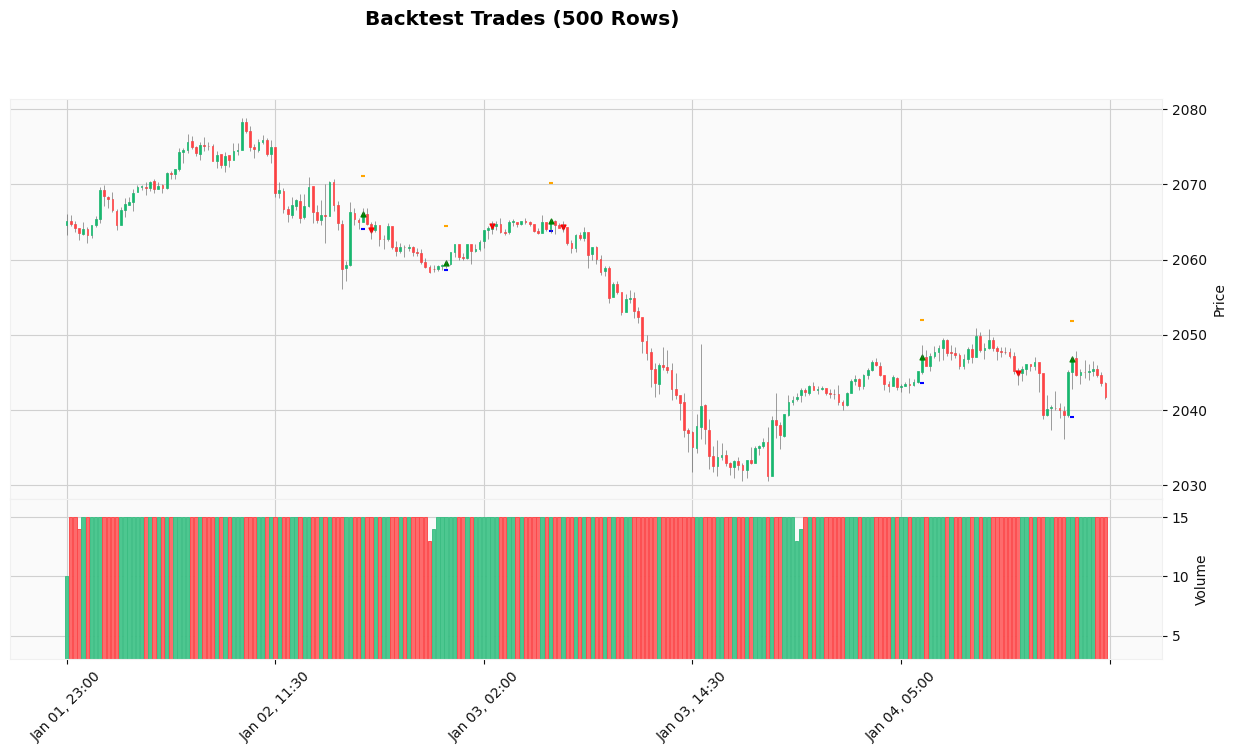

In [5]:
# === Plot chart ===
mpf.plot(
    ohlc_limited,
    type='candle',
    style='yahoo',
    addplot=ap,
    figsize=(16,8),
    title='Backtest Trades (500 Rows)',
    volume=True
)